## 3번 문제

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn import svm
from sklearn.svm import SVC

#드라이브에 저장된 데이터 부르기
lin_csv=pd.read_csv('./drive/MyDrive/data_svm_lin (1).csv')
rbf_csv=pd.read_csv('./drive/MyDrive/data_svm_rbf (1).csv')

In [3]:
#Linear SVM, Kernel SVM 데이터를 Panda의 DataFrame에 저장 (header 처리)
lin_csv = pd.DataFrame(lin_csv).rename(columns={'x1':1,'x2':2,'label':0})
lin_X = pd.concat([lin_csv[1],lin_csv[2]], axis=1)
lin_y = lin_csv[0]

rbf_csv = pd.DataFrame(rbf_csv).rename(columns={'x1':1,'x2':2,'label':0})
rbf_X = pd.concat([rbf_csv[1],rbf_csv[2]], axis=1)
rbf_y = rbf_csv[0]

### a. Linear SVM

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<Figure size 576x432 with 0 Axes>

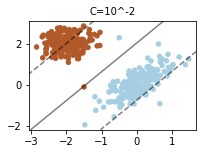

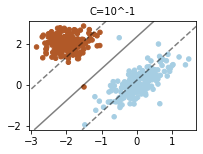

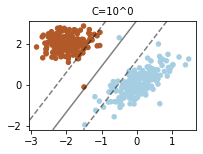

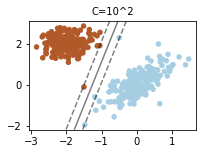

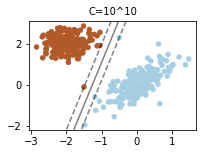

In [4]:
C_2d_range = [1e-2, 1e-1, 1, 1e2, 1e10]
classifiers = []
for C in C_2d_range:
    clf = svm.LinearSVC(C=C)
    clf.fit(lin_X, lin_y)
    classifiers.append((C, clf))

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, clf)) in enumerate(classifiers):
    plt.figure(figsize=(3, 2))
    plt.title("C=10^%d" % (np.log10(C)),size='medium')
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(lin_X.values[:,0], lin_X.values[:,1], c=lin_y.values, s=20, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 10)
    yy = np.linspace(ylim[0], ylim[1], 10)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z1 = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z1, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()

C= 10^(-2), 10^(-1), 10^(0), 10^(2), 10^(10) 결과를 순서대로 볼 수 있다.  
10^(-2) ~ 10^(2)에서 거슬러 올라가보면 C가 작을 때, support vector가 많이 허용되어 decision boundary 안에 많이 포진되어있음을 알 수 있다.  
C가 커질수록, support vector가 갈수록 적어지면서 C=10^2에서는 1,2개 있음을 볼 수 있다.  
hard-margin SVM에 속하는 C =10^10의 형태는 support vector가 1,2개 있음을 볼 수 있다.  

### b. Kernel SVM

<Figure size 576x432 with 0 Axes>

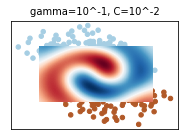

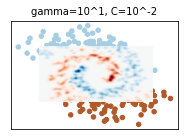

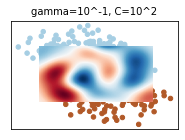

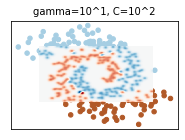

In [5]:
C_2d_range = [1e-2, 1e2]
gamma_2d_range = [1e-1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel='rbf',C=C, gamma=gamma)
        clf.fit(rbf_X, rbf_y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-10, 10, 400), np.linspace(-8, 6, 400))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(3, 2))
    plt.scatter(rbf_X.values[:,0], rbf_X.values[:,1], c=rbf_y.values, s=20, cmap=plt.cm.Paired)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),size='medium')
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.xticks(())
    plt.yticks(())

clf = SVC(kernel='rbf',C=C, gamma=gamma)  
와 같이 kernel SVM을 정의하였다.

대강 결과를 보면, gamma = 10^(-1), C=10^(-2)일 때 제일 합리적임을 알 수 있다.

C_2d_range = [1e-2, 1e2], gamma_2d_range = [1e-1, 1e1] 결과를 순서대로 볼 수 있다.  
gamma가 커질수록 좁은 kernel shape로 더 overfit 하는 경향을 볼 수 있다.
C가 커질수록 boundary가 뚜렷해지는 경향을 볼 수 있다.
